3.3 Implementing and experimenting with kernel ridge regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

$\hat{\alpha} = (G + \lambda I)^{-1}y$

In [13]:
def RBFkernel(X, Y, tau):
    dist_matrix = np.sum(X**2, axis=1)[:, np.newaxis] - 2 * np.dot(X, Y.T) + np.sum(Y**2, axis=1)
    kernel_matrix = np.exp(-dist_matrix / (2 * tau**2))
    return kernel_matrix

# (a)
def predictKRR(X, Z, alpha, tau, offset):
    return offset + RBFkernel(X, Z, tau) @ alpha

# (b)
def fitKRR(X, y, Lambda, tau):
    yMean = np.mean(y)
    y = y - yMean
    G = RBFkernel(X, X, tau)
    alpha = np.linalg.solve(G + Lambda * np.eye(X.shape[0]), y)
    return alpha, yMean

In [64]:
def KRR(X, y, tau, lambda_list):
    sorted_indices = sorted(range(len(X)), key=lambda i: X[i,0])
    X = np.array([X[i] for i in sorted_indices])
    y = [y[i] for i in sorted_indices]
    for Lambda in lambda_list:
        alpha, yMean = fitKRR(X, y, Lambda, tau)
        y_hat = predictKRR(X, X, alpha, tau, offset=yMean)
        plt.plot(X[:,0], y_hat, label=f'$\lambda$={Lambda}')
    plt.scatter(X[:,0], y, label='y')
    plt.xlabel('lcavol')
    plt.ylabel('lpsa')
    plt.title(f'τ={tau}')
    plt.legend()
    plt.show()

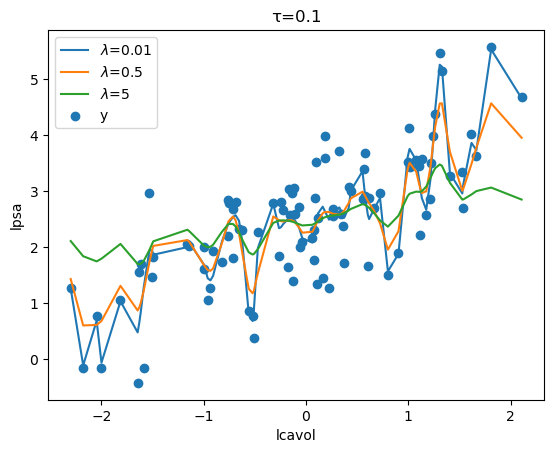

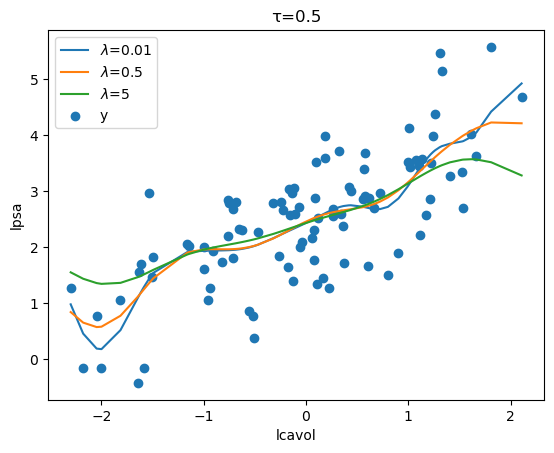

In [66]:
# (c)
df = pd.read_csv('lprostate.dat', sep='\t')
X = df[['lcavol']].values
y = df['lpsa'].values
X -= np.mean(X, axis=0, keepdims=True)
X /= np.std(X, axis=0, keepdims=True)
KRR(X, y, tau=0.1, lambda_list=[0.01, 0.5, 5])
# (d)
KRR(X, y, tau=0.5, lambda_list=[0.01, 0.5, 5])

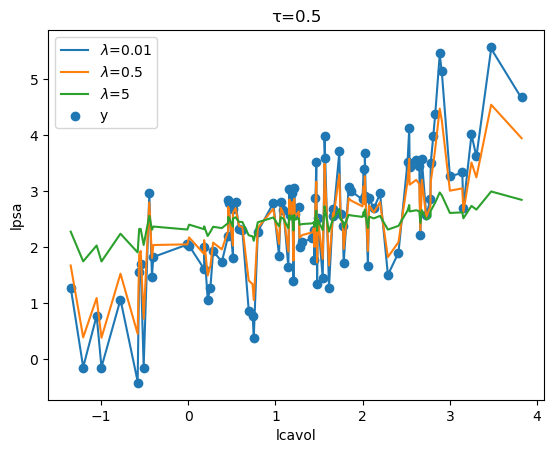

In [71]:
# (e)
X = df.iloc[:,1:-1].values
y = df['lpsa'].values
KRR(X, y, tau=0.5, lambda_list=[0.01, 0.5, 5])

(f) $\text{dof}(\hat{f})=\frac{1}{\sigma^2}\sum_{i=1}^n\text{COV}(\hat{y_i},y_i)=\text{tr}(G(G + λI)^{−1}) $

In [96]:
tau = 0.5
Lambda = 0.1
X = df.iloc[:,1:-1].values
y = df['lpsa'].values
n = X.shape[0]
G = RBFkernel(X, X, tau)
alpha, yMean = fitKRR(X, y, Lambda, tau)
y_hat = predictKRR(X, X, alpha, tau, offset=yMean)
H_lambda  = G @ np.linalg.inv(G + Lambda * np.eye(n))
dof_f_hat = np.trace(H_lambda)
sigma_sq_hat = 1 / (n - 2 * dof_f_hat + np.trace(H_lambda @ H_lambda)) * (np.sum((y_hat - y)**2))
print('variance estimate:', sigma_sq_hat)

variance estimate: 0.8461683654168924


$\text{Var}(\hat{y_i}) = \text{Cov}(H_λy)_{ii} = σ^2{H_\lambda^2}_{ii} \approx \hat{σ}^2{H_\lambda^2}_{ii}$

variance estimate: 0.6375057074883118


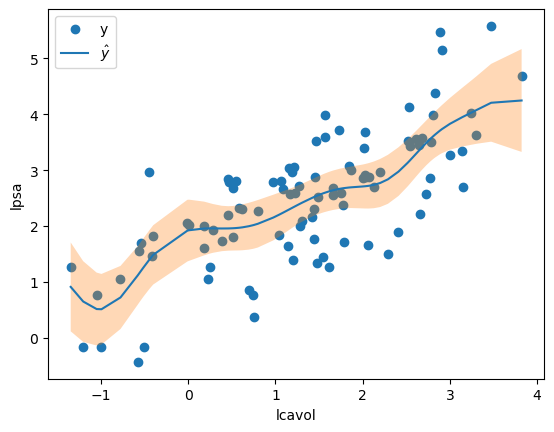

In [100]:
X = df[['lcavol']].values
y = df['lpsa'].values
sorted_indices = sorted(range(len(X)), key=lambda i: X[i,0])
X = np.array([X[i] for i in sorted_indices])
y = [y[i] for i in sorted_indices]
Lambda = 0.5
tau = 0.5
G = RBFkernel(X, X, tau)
alpha, yMean = fitKRR(X, y, Lambda, tau)
y_hat = predictKRR(X, X, alpha, tau, offset=yMean)
H_lambda  = G @ np.linalg.inv(G + Lambda * np.eye(n))
dof_f_hat = np.trace(H_lambda)
sigma_sq_hat = 1 / (n - 2 * dof_f_hat + np.trace(H_lambda @ H_lambda)) * (np.sum((y_hat - y)**2))
print('variance estimate:', sigma_sq_hat)
std_y_hat = np.sqrt(sigma_sq_hat * np.diag(H_lambda @ H_lambda))
plt.scatter(X[:,0], y, label='y')
plt.plot(X[:,0], y_hat, label='$\hat{y}$')
plt.fill_between(X[:,0], y_hat - 2 * std_y_hat, y_hat + 2 * std_y_hat, alpha=0.3)
plt.xlabel('lcavol')
plt.ylabel('lpsa')
plt.legend()
plt.show()